In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fitter import Fitter
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_dd = pd.read_csv('/home/phiofs/Documentos/GitHub/ms-dscience/data/flights.csv')
df_dd.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## Depuracion de la df

In [6]:
# Analisis de dimension
df_dd.shape

(271940, 20)

In [7]:
# Revisa si hay algun valor nulo en cada columna
for i in df_dd.columns:
    if any(df_dd[i].isnull()):
        print(f"Existe algun valor nulo en la columna {i}")

Existe algun valor nulo en la columna DepDel15


In [8]:
# Revisa cuantos valores nulos hay en depdelay15
df_dd.DepDel15[df_dd.DepDel15.isnull()].shape

(2761,)

In [9]:
df_dd[df_dd.DepDel15.isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1


- Como **DepDel15** esta relacionada con DepDelay se realiza la hipotesis de que no hay valor en DepDel15 porque DepDelay es 0.0

In [10]:
df_dd.DepDelay.describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

In [11]:
df_dd[df_dd.DepDelay <= 0].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
14,2013,10,20,7,AS,14107,Phoenix Sky Harbor International,Phoenix,AZ,14747,Seattle/Tacoma International,Seattle,WA,1330,-11,0.0,1628,-15,0,0
15,2013,4,14,7,AA,12892,Los Angeles International,Los Angeles,CA,13830,Kahului Airport,Kahului,HI,1730,-7,0.0,2010,26,1,0


- Se comprueba exitosamente la existencia de valores de 0 para DepDelay menores que 0, entonces podemos cambiar los valores perdidos de DepDel15 por 0

In [12]:
df_dd.DepDel15.fillna(0, inplace=True)

In [13]:
df_dd.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Realicemos un analisis de los valores de la columna DepDelay y ArrDelay

In [14]:
df_dd.DepDelay.describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

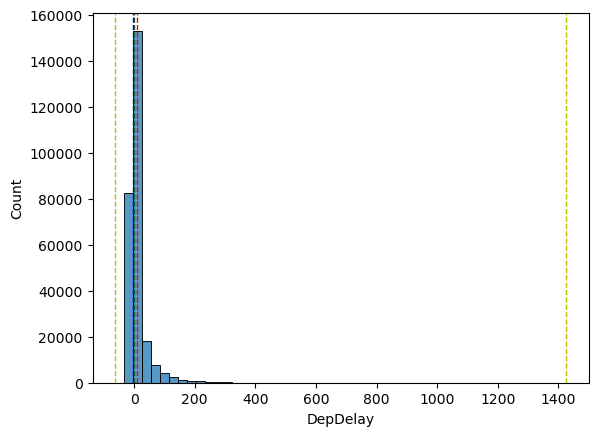

In [15]:
sns.histplot(df_dd.DepDelay, bins=50)
# colocar la media moda y mediana en el histograma
plt.axvline(df_dd.DepDelay.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.mode()[0], color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.max(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.min(), color='y', linestyle='dashed', linewidth=1)

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DepDelay'>

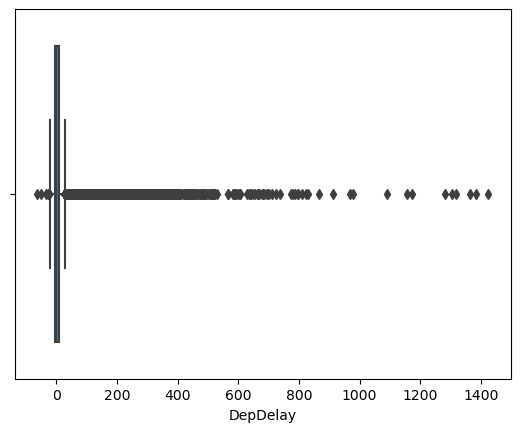

In [16]:
sns.boxplot(df_dd.DepDelay)

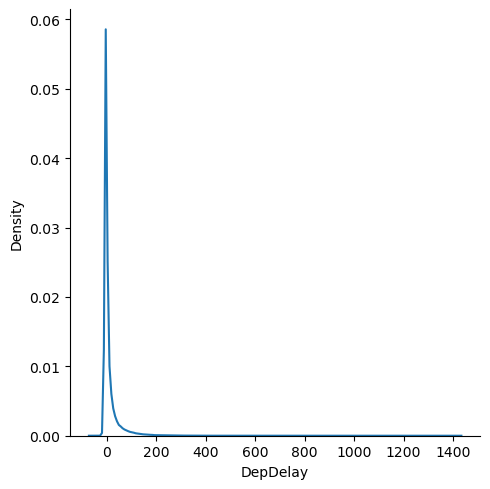

In [17]:
sns.displot(df_dd.DepDelay, kind='kde')

- Ciertamente existen valores considerados outliers dentro de la columna DepDelay

In [18]:
def removedor_outliers(df, col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    filtro = (df[col] >= q1 - k*iqr) & (df[col] <= q3 + k*iqr)
    return df.loc[filtro, :]

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DepDelay'>

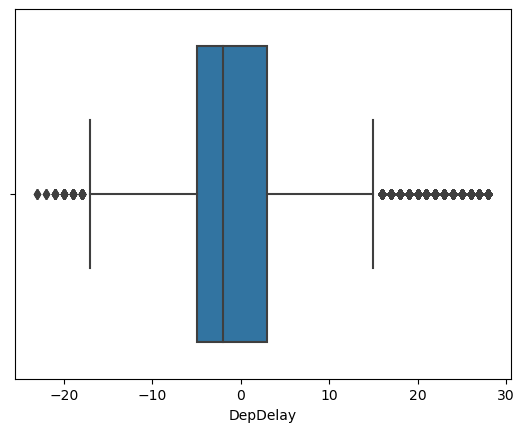

In [19]:
df_dd=removedor_outliers(df_dd, 'DepDelay', k=1.5) 

sns.boxplot(df_dd.DepDelay)

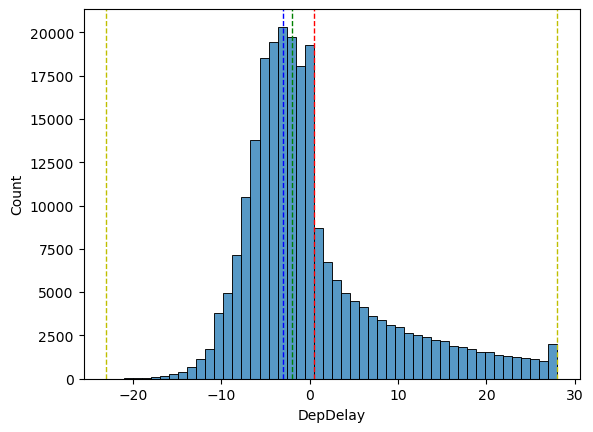

In [20]:
sns.histplot(df_dd.DepDelay, bins=50)
# colocar la media moda y mediana en el histograma
plt.axvline(df_dd.DepDelay.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.mode()[0], color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.max(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.min(), color='y', linestyle='dashed', linewidth=1)

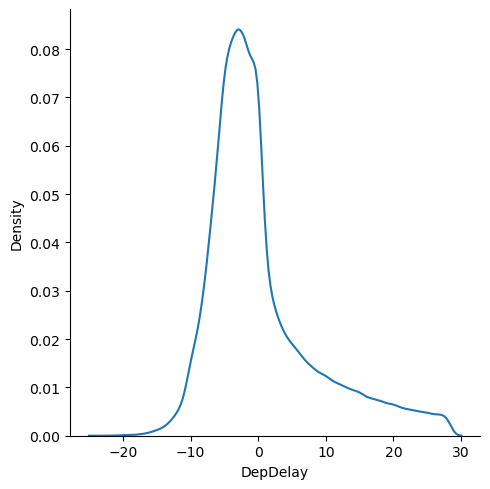

In [21]:
sns.displot(df_dd.DepDelay, kind='kde')

Debido a que tenemos que hacer esto de nuevo definire una funcion para hacerlo

In [22]:
def plot_outliers(df, col):
    fig, axs = plt.subplots(1,3, figsize = (25,5))
    sns.boxplot(df[col], ax=axs[0])
    sns.histplot(df[col], bins=50, ax=axs[1])
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    max_value = df[col].max()
    min_value = df[col].min()
    axs[1].axvline(mean, color='r', linestyle='dashed', linewidth=1)
    axs[1].axvline(median, color='g', linestyle='dashed', linewidth=1)
    axs[1].axvline(mode, color='b', linestyle='dashed', linewidth=1)
    axs[1].axvline(max_value, color='y', linestyle='dashed', linewidth=1)
    axs[1].axvline(min_value, color='y', linestyle='dashed', linewidth=1)
    sns.kdeplot(df[col],ax=axs[2])
    plt.show()

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


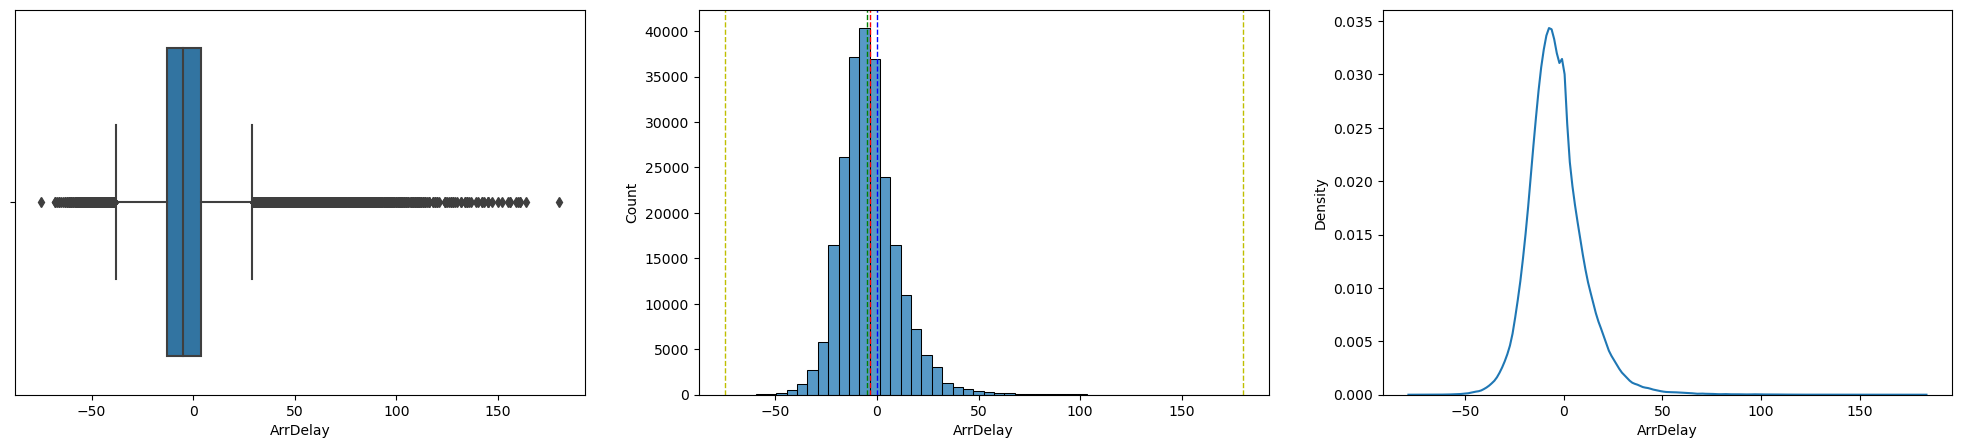

In [23]:
plot_outliers(df_dd,'ArrDelay')

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


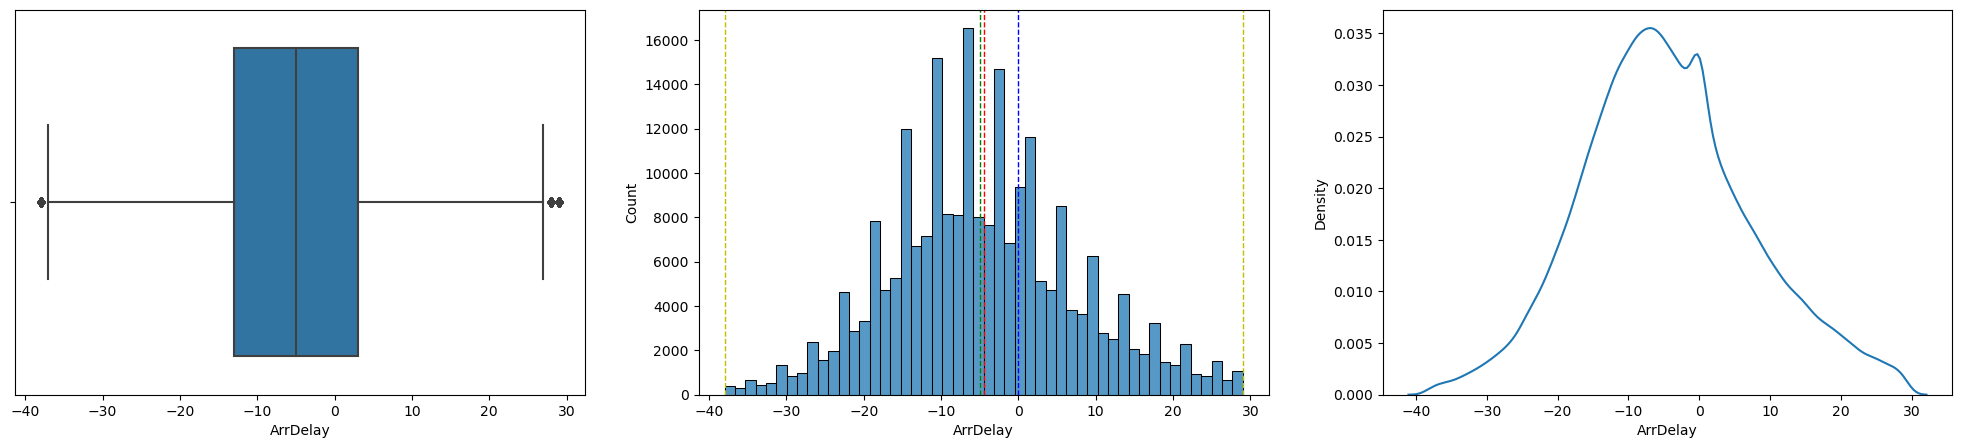

In [24]:
df_dd=removedor_outliers(df_dd, 'ArrDelay', k=1.5)
plot_outliers(df_dd,'ArrDelay')

In [25]:
# Analisis de dimension
df_dd.shape

(231247, 20)

Existe un cambio en la dimension por las celdas que fueron depuradas entonces queda completamente limpia la data. 

## Exploremos la data depurada

In [26]:
# Variables categricas
df_dd.describe(exclude='number')

,Carrier,OriginAirportName,OriginCity,OriginState,DestAirportName,DestCity,DestState
count,231247,231247,231247,231247,231247,231247,231247
unique,16,70,66,36,70,66,36
top,WN,Hartsfield-Jackson Atlanta International,Chicago,CA,Hartsfield-Jackson Atlanta International,Chicago,CA
freq,48963,12989,14219,33169,13096,14785,32074


In [27]:
df_dd.describe(include='number')

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,231247.0,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000,231247.000000
mean,2013.0,7.021721,15.800490,3.904150,12756.934983,12737.101121,1291.456300,0.217659,0.076010,1473.366054,-4.505373,0.087020,0.012307
std,0.0,2.004542,8.851392,1.997062,1509.030249,1504.878492,470.252867,7.853408,0.265014,488.005050,12.098459,0.281864,0.110253
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-23.000000,0.000000,1.000000,-38.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,855.000000,-5.000000,0.000000,1100.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1247.000000,-2.000000,0.000000,1455.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1700.000000,3.000000,0.000000,1855.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,28.000000,1.000000,2359.000000,29.000000,1.000000,1.000000


In [28]:
# usar fitter para ver la distribucion de las variables
#f = Fitter(df_dd['DepDelay'])
#f.fit()
#f.summary()

In [29]:
# usar fitter para ver la distribucion de las variables
#f = Fitter(df_dd['ArrDelay'])
#f.fit()
#f.summary()

In [30]:
for i in ['DepDelay', 'ArrDelay']:
    print(stats.normaltest(df_dd[i]))

NormaltestResult(statistic=51254.38843030425, pvalue=0.0)
NormaltestResult(statistic=2278.8756116996924, pvalue=0.0)


### *What are the average (mean) departure and arrival delays?*

In [31]:
for i in ['DepDelay', 'ArrDelay']:
    print(f'La media de {i} es {df_dd[i].mean()} minutos y la desviacion estandar es {df_dd[i].std()} minutos')

La media de DepDelay es 0.21765903990105817 minutos y la desviacion estandar es 7.853407804733274 minutos
La media de ArrDelay es -4.50537304267731 minutos y la desviacion estandar es 12.098458524064762 minutos


### *How do the carriers compare in terms of arrival delay performance?*

<AxesSubplot:xlabel='Carrier', ylabel='ArrDelay'>

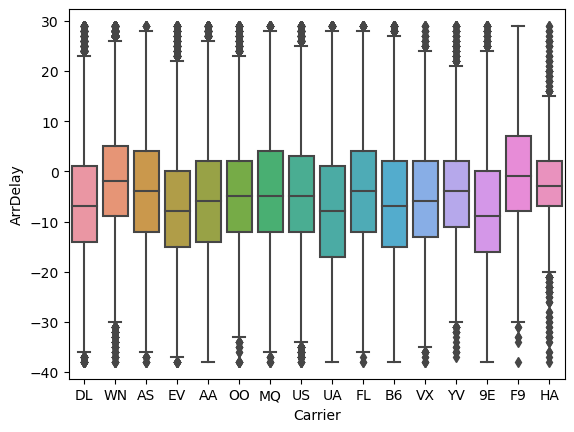

In [32]:
# Comparacion entre una variable categorica y una numerica
sns.boxplot(x='Carrier',y= 'ArrDelay', data=df_dd)

In [33]:
df_dd.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)

Carrier
F9   -0.097414
WN   -1.274779
HA   -2.538803
FL   -3.308431
YV   -3.622750
MQ   -3.755393
OO   -3.939554
US   -3.962736
AS   -4.281494
VX   -5.262368
AA   -5.458915
B6   -5.728547
DL   -6.275079
EV   -6.418824
9E   -7.487881
UA   -7.583730
Name: ArrDelay, dtype: float64

### *Is there a noticable difference in arrival delays for different days of the week?*

In [34]:
df_dd.groupby('DayOfWeek')['ArrDelay'].mean().sort_values(ascending=False)

DayOfWeek
4   -3.257212
5   -3.807781
3   -4.292989
1   -4.367383
7   -4.996028
2   -5.130754
6   -5.909817
Name: ArrDelay, dtype: float64

In [35]:
# realiza la prueba tukey para ver si hay diferencias significativas entre las medias
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_dd['ArrDelay'], groups=df_dd['DayOfWeek'], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.7634    0.0 -1.0333 -0.4935   True
     1      3   0.0744 0.9838 -0.1954  0.3442  False
     1      4   1.1102    0.0  0.8372  1.3831   True
     1      5   0.5596    0.0  0.2867  0.8325   True
     1      6  -1.5424    0.0 -1.8283 -1.2565   True
     1      7  -0.6286    0.0 -0.9032 -0.3541   True
     2      3   0.8378    0.0  0.5678  1.1078   True
     2      4   1.8735    0.0  1.6005  2.1466   True
     2      5    1.323    0.0  1.0499   1.596   True
     2      6  -0.7791    0.0 -1.0651  -0.493   True
     2      7   0.1347 0.7767   -0.14  0.4095  False
     3      4   1.0358    0.0  0.7628  1.3088   True
     3      5   0.4852    0.0  0.2122  0.7582   True
     3      6  -1.6168    0.0 -1.9028 -1.3308   True
     3      7   -0.703    0.0 -0.9777 -0.4284   True
     4      5  -0.5506    0.0 -0.8266 -0.2745 

<AxesSubplot:xlabel='DayOfWeek', ylabel='ArrDelay'>

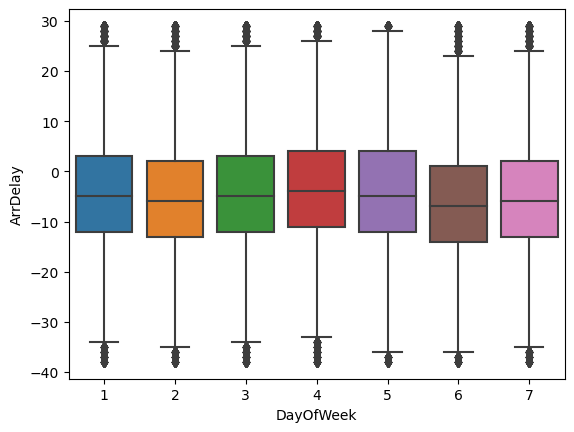

In [36]:
sns.boxplot(x='DayOfWeek',y= 'ArrDelay', data=df_dd)

### *Which departure airport has the highest average departure delay?*


In [37]:
# OriginAirportName and DepDelay
df_dd.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False).head(5)

OriginAirportName
Chicago Midway International                            4.766591
Dallas Love Field                                       3.976457
William P Hobby                                         3.564986
Denver International                                    2.582640
Baltimore/Washington International Thurgood Marshall    2.412772
Name: DepDelay, dtype: float64

### *Do **late** departures tend to result in longer arrival delays than on-time departures?*

In [55]:
# Late >0 y ontime =0 

df_late= df_dd[df_dd.DepDelay>0]
df_ontime = df_dd[df_dd.DepDelay<=0]


In [86]:
# No hay necesidad de una normalizacion de los datos. 
# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_late[['Carrier', 'DepDelay', 'ArrDelay']].copy()

# Normalize the numeric columns
df_normalized[['DepDelay','ArrDelay']] = scaler.fit_transform(df_normalized[['DepDelay','ArrDelay']])


In [87]:
df_normalized.DepDelay.corr(df_normalized.ArrDelay)

0.5358129303865458

Como las dos siguen una distribucion normal entonces podemos hacer una correlacion

In [88]:
df_late.DepDelay.corr(df_late.ArrDelay)

0.5358129303865462

In [89]:
df_ontime.DepDelay.corr(df_ontime.ArrDelay)

0.24194754465198282

In [41]:
df_ontime.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

<AxesSubplot:xlabel='DepDelay', ylabel='ArrDelay'>

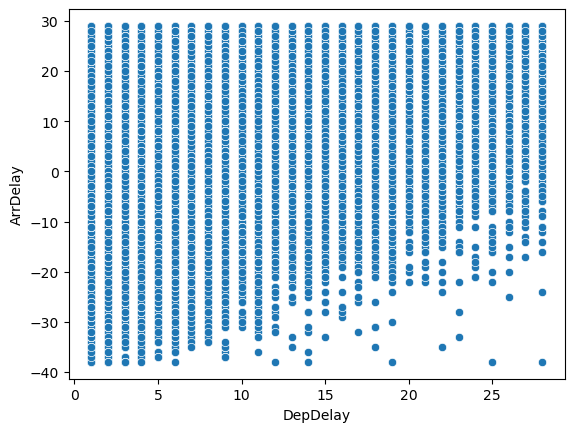

In [90]:
sns.scatterplot(x='DepDelay', y='ArrDelay', data=df_late)

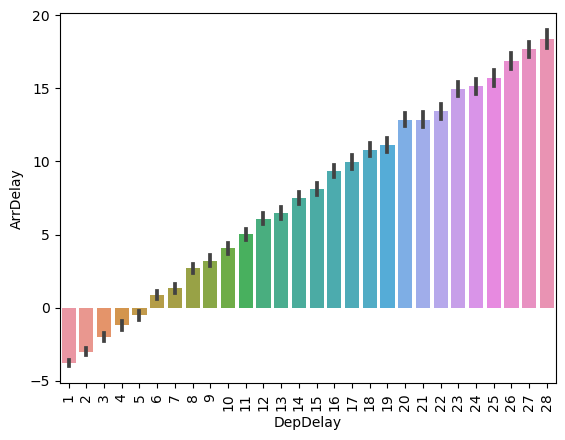

In [73]:
sns.barplot(x='DepDelay', y = 'ArrDelay', data=df_late)
plt.xticks(rotation= 90)
plt.show()


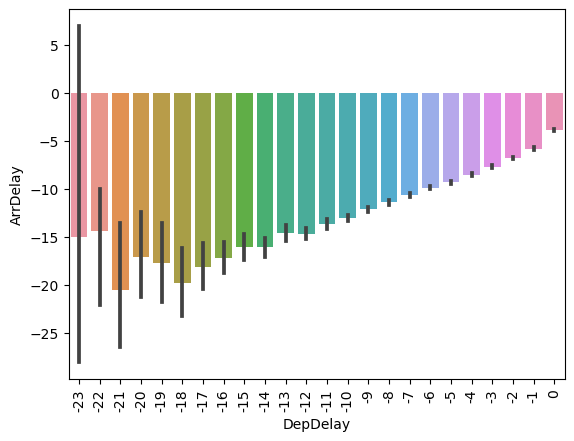

In [74]:
sns.barplot(x='DepDelay', y = 'ArrDelay', data=df_ontime)
plt.xticks(rotation= 90)
plt.show()


<AxesSubplot:xlabel='DepDelay', ylabel='ArrDelay'>

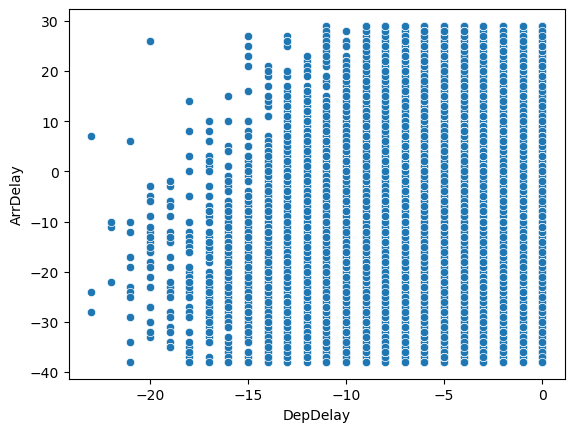

In [75]:
sns.scatterplot(x='DepDelay', y='ArrDelay', data=df_ontime)

slope: 0.8455
y-intercept: -4.7543
so...
 f(x) = 0.8455x + -4.7543


<function matplotlib.pyplot.show(close=None, block=None)>

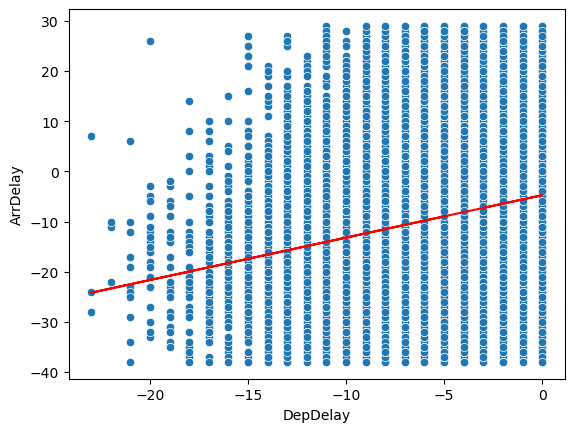

In [91]:
df_regression = df_ontime[['DepDelay','ArrDelay']].copy()

m,b,r,p,se = stats.linregress(df_regression.DepDelay,df_regression.ArrDelay)
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

df_regression['fx']= m*df_regression.DepDelay + b
df_regression['error'] = df_regression['fx'] - df_regression['ArrDelay']

sns.scatterplot(x ='DepDelay', y='ArrDelay', data=df_regression)
plt.plot(df_regression['DepDelay'], df_regression['fx'], color = 'red')
plt.show


In [80]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['DepDelay', 'ArrDelay', 'fx', 'error']]

,DepDelay,ArrDelay,fx,error
2,-3,-7,-7.290761,-0.290761
4,-1,-9,-5.599814,3.400186
6,-1,-3,-5.599814,-2.599814
14,-11,-15,-14.054549,0.945451
15,-7,26,-10.672655,-36.672655
...,...,...,...,...
271929,0,-6,-4.754341,1.245659
271932,-2,0,-6.445288,-6.445288
271933,-6,-11,-9.827181,1.172819
271934,-7,-12,-10.672655,1.327345


slope: 0.8380
y-intercept: -4.4806
so...
 f(x) = 0.8380x + -4.4806


<function matplotlib.pyplot.show(close=None, block=None)>

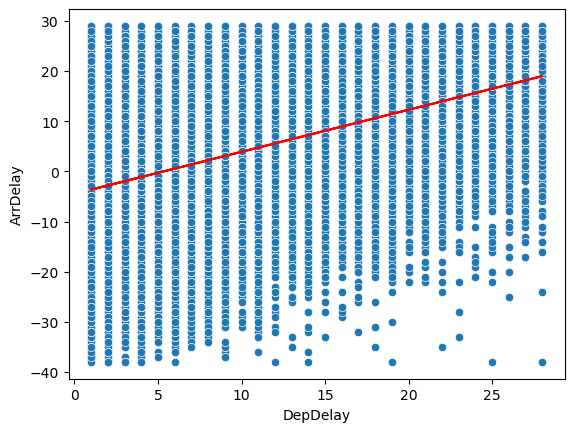

In [92]:
df_regression = df_late[['DepDelay','ArrDelay']].copy()

m,b,r,p,se = stats.linregress(df_regression.DepDelay,df_regression.ArrDelay)
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

df_regression['fx']= m*df_regression.DepDelay + b
df_regression['error'] = df_regression['fx'] - df_regression['ArrDelay']

sns.scatterplot(x ='DepDelay', y='ArrDelay', data=df_regression)
plt.plot(df_regression['DepDelay'], df_regression['fx'], color = 'red')
plt.show

In [82]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['DepDelay', 'ArrDelay', 'fx', 'error']]

,DepDelay,ArrDelay,fx,error
0,4,13,-1.128568,-14.128568
1,3,22,-1.966563,-23.966563
7,4,15,-1.128568,-16.128568
8,8,-10,2.223414,12.223414
10,3,-8,-1.966563,6.033437
...,...,...,...,...
271921,12,-7,5.575397,12.575397
271923,7,9,1.385419,-7.614581
271930,12,5,5.575397,0.575397
271931,2,-10,-2.804559,7.195441


In [94]:
# Se definira sobre late vs arrdep 
def f(x):
    m = 0.8380
    b = -4.4806
    return m*x + b

# Retraso min solo se puede definir positivo
retraso_min = 30

# Retraso en fz
prediction = f(retraso_min)
# Un atraso no puede valer menos de 0 sino seria adelanto 
expected_atraso = max(0,prediction)

#Print the estimated grade
print ('Un vuelo retrasado {} minutos puede resultar en un atraso de arribo de {:.0f} minutos'.format(retraso_min, expected_atraso))

Un vuelo retrasado 30 minutos puede resultar en un atraso de arribo de 21 minutos


In [112]:
# Se definira sobre ontime vs arrdep
def f(x):
    m = 0.8455
    b = -4.7543
    return m*x + b

# adelanto min solo se puede definir negativo
adelanto_min = -10

# Retraso en fz
prediction = f(adelanto_min)
# Un atraso no puede valer mas de 0 sino seria retraso 
expected_adelanto = prediction
#Print the estimated grade
print ('Un vuelo adelantado {} minutos puede resultar en un adelanto de arribo de {:.0f} minutos'.format(adelanto_min*-1, expected_adelanto*-1))

Un vuelo adelantado 10 minutos puede resultar en un adelanto de arribo de 13 minutos


### *Which route (from origin airport to destination airport) has the most **late** arrivals?*

In [114]:
df_dd.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0


In [132]:
df_ordenado=df_dd[['OriginAirportID','DestAirportID']].groupby(df_dd.ArrDelay[df_dd.ArrDelay>0]).value_counts().sort_values(ascending=False)

df_ordenado.head()

ArrDelay  OriginAirportID  DestAirportID
1.0       13830            12173            41
2.0       12173            13830            31
1.0       12173            13830            28
2.0       13830            12173            27
1.0       12191            11259            27
dtype: int64

In [154]:
first_place=df_ordenado.head(1)
origin_id = first_place.index[0][1]
dest_id = first_place.index[0][2]
cant_vuelos= first_place.iloc[0]

dest_airport=df_dd.DestAirportName[df_dd.DestAirportID==dest_id].unique()[0]
org_airport= df_dd.DestAirportName[df_dd.DestAirportID==origin_id].unique()[0]

print("La ruta que comienza en {} y termina en {} es la que tiene mas arribos tardios con {:.0f} vuelos".format(org_airport,dest_airport,cant_vuelos))


La ruta que comienza en Kahului Airport y termina en Honolulu International es la que tiene mas arribos tardios con 41 vuelos


### *Which route has the highest average arrival delay?*

In [185]:
df_prueba = df_dd.groupby(['OriginAirportID','DestAirportID'])
df_prueba=df_prueba.ArrDelay.mean().sort_values(ascending=False)

In [199]:
first_place=df_prueba.head(1)
origin_id, dest_id= first_place.index[0]
min_vuelos= first_place.iloc[0]

dest_airport=df_dd.DestAirportName[df_dd.DestAirportID==dest_id].unique()[0]
org_airport= df_dd.DestAirportName[df_dd.DestAirportID==origin_id].unique()[0]

print("La ruta que comienza en {} y termina en {} es la que tiene el promedio mas alto de arribo tardio con {:.0f} minutos".format(org_airport,dest_airport,min_vuelos))


La ruta que comienza en Louis Armstrong New Orleans International y termina en Ronald Reagan Washington National es la que tiene el promedio mas alto de arribo tardio con 25 minutos
